In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [38]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline, make_pipeline
from scipy.stats import skew
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import Imputer

In [39]:
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import ElasticNet, SGDRegressor, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBRegressor

In [40]:
price_origin_train = pd.read_csv('./remastered.csv')
price_origin_test = pd.read_csv('./test.csv')

pd.set_option("display.max_columns",1000000)
pd.set_option('display.max_rows', 1000000)






In [41]:
price_origin_train.head(5)

,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,2,0,4,4,4,5,3,CollgCr,Norm,Norm,1Fam,4,7,5,2003,2003,Gable,2,VinylSd,VinylSd,3.0,196.0,4,3,4,4,3,1,6,706,1,0,150,856,5,5,Y,5.0,856,854,0,1710,1,0,2,1,3,1,4,8,8,0,0,5,2003,2,2,548,3,3,3,0,61,0,0,0,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,2,0,4,4,4,2,3,Veenker,Feedr,Norm,1Fam,1,6,8,1976,1976,Gable,2,MetalSd,MetalSd,1.0,0.0,3,3,5,4,3,4,5,978,1,0,284,1262,5,5,Y,5.0,1262,0,0,1262,0,1,2,0,3,1,3,6,8,1,3,5,1976,2,2,460,3,3,3,298,0,0,0,0,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,2,0,3,4,4,5,3,CollgCr,Norm,Norm,1Fam,4,7,5,2001,2002,Gable,2,VinylSd,VinylSd,3.0,162.0,4,3,4,4,3,2,6,486,1,0,434,920,5,5,Y,5.0,920,866,0,1786,1,0,2,1,3,1,4,6,8,1,3,5,2001,2,2,608,3,3,3,0,42,0,0,0,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,2,0,3,4,4,4,3,Crawfor,Norm,Norm,1Fam,4,7,5,1915,1970,Gable,2,Wd Sdng,Wd Shng,1.0,0.0,3,3,6,3,4,1,5,216,1,0,540,756,5,4,Y,5.0,961,756,0,1717,1,0,1,0,3,1,4,7,8,1,4,1,1998,1,3,642,3,3,3,0,35,272,0,0,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,2,0,3,4,4,2,3,NoRidge,Norm,Norm,1Fam,4,8,5,2000,2000,Gable,2,VinylSd,VinylSd,3.0,350.0,4,3,4,4,3,3,6,655,1,0,490,1145,5,5,Y,5.0,1145,1053,0,2198,1,0,2,1,4,1,4,9,8,1,3,5,2000,2,3,836,3,3,3,192,84,0,0,0,0,0,0,NaN,0,12,2008,WD,Normal,250000


In [81]:
price_origin_train['MSSubClass'] = price_origin_train['MSSubClass'].astype(object)

In [83]:
lis = ['YrSold','YearBuilt','YearRemodAdd','GarageYrBlt']

price_origin_train[lis] = price_origin_train[lis].astype(str)

In [74]:
label = LabelEncoder()

# labelencoder 把object 改成了int

In [85]:
price_origin_train["YearBuilt"] = label.fit_transform(price_origin_train["YearBuilt"])
price_origin_train["YearRemodAdd"] = label.fit_transform(price_origin_train["YearRemodAdd"])
price_origin_train["GarageYrBlt"] = label.fit_transform(price_origin_train["GarageYrBlt"])
price_origin_train["YrSold"] = label.fit_transform(price_origin_train["YrSold"])






In [86]:

# price_origin_train.drop(['SalePrice','Id','index'],axis=1,inplace=True)

price_origin_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,2,0,4,4,4,5,3,CollgCr,Norm,Norm,1Fam,4,7,5,3,27,Gable,2,VinylSd,VinylSd,3.0,196.0,4,3,4,4,3,1,6,706,1,0,150,856,5,5,Y,5.0,856,854,0,1710,1,0,2,1,3,1,4,8,8,0,0,5,90,2,2,548,3,3,3,0,61,0,0,0,0,0,0,NaN,0,2,2,WD,Normal
1,20,RL,80.0,9600,2,0,4,4,4,2,3,Veenker,Feedr,Norm,1Fam,1,6,8,18,16,Gable,2,MetalSd,MetalSd,1.0,0.0,3,3,5,4,3,4,5,978,1,0,284,1262,5,5,Y,5.0,1262,0,0,1262,0,1,2,0,3,1,3,6,8,1,3,5,44,2,2,460,3,3,3,298,0,0,0,0,0,0,0,NaN,0,5,1,WD,Normal
2,60,RL,68.0,11250,2,0,3,4,4,5,3,CollgCr,Norm,Norm,1Fam,4,7,5,84,26,Gable,2,VinylSd,VinylSd,3.0,162.0,4,3,4,4,3,2,6,486,1,0,434,920,5,5,Y,5.0,920,866,0,1786,1,0,2,1,3,1,4,6,8,1,3,5,83,2,2,608,3,3,3,0,42,0,0,0,0,0,0,NaN,0,9,2,WD,Normal
3,70,RL,60.0,9550,2,0,3,4,4,4,3,Crawfor,Norm,Norm,1Fam,4,7,5,45,35,Gable,2,Wd Sdng,Wd Shng,1.0,0.0,3,3,6,3,4,1,5,216,1,0,540,756,5,4,Y,5.0,961,756,0,1717,1,0,1,0,3,1,4,7,8,1,4,1,80,1,3,642,3,3,3,0,35,272,0,0,0,0,0,NaN,0,2,0,WD,Abnorml
4,60,RL,84.0,14260,2,0,3,4,4,2,3,NoRidge,Norm,Norm,1Fam,4,8,5,70,24,Gable,2,VinylSd,VinylSd,3.0,350.0,4,3,4,4,3,3,6,655,1,0,490,1145,5,5,Y,5.0,1145,1053,0,2198,1,0,2,1,4,1,4,9,8,1,3,5,82,2,3,836,3,3,3,192,84,0,0,0,0,0,0,NaN,0,12,2,WD,Normal


In [87]:
price_origin_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
MSSubClass       1460 non-null object
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null int64
Alley            1460 non-null int64
LotShape         1460 non-null int64
LandContour      1460 non-null int64
Utilities        1460 non-null int64
LotConfig        1460 non-null int64
LandSlope        1460 non-null int64
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null int64
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null o

In [88]:
price_origin_train_X_without4 = price_origin_train.drop(['LotFrontage','MasVnrArea','MasVnrType','Electrical'],axis=1)


In [94]:
price_origin_train_X_without4.describe()

,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.00000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,2.004110,0.158904,3.591781,3.839041,3.998630,4.583562,2.937671,2.562329,6.099315,5.575342,52.439041,25.575342,2.075342,3.39589,3.083562,4.603425,3.489041,2.934932,1.630137,3.545890,443.639726,1.247260,46.549315,567.240411,1057.429452,4.963699,4.145205,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,3.511644,6.517808,7.841781,0.613014,1.825342,3.514384,54.543836,1.715753,1.767123,472.980137,2.810274,2.808904,2.856164,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,0.017808,0.565753,43.489041,6.321918,1.815753
std,9981.264932,0.063996,0.628942,0.582296,0.503024,0.052342,0.773448,0.276232,1.954122,1.382997,1.112799,33.481467,15.678109,0.599127,0.57428,0.351054,0.722394,0.876478,0.552159,1.067391,2.107776,456.098091,0.892332,161.319273,441.866955,438.705324,0.295124,0.959501,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,0.663760,1.625393,0.667698,0.644666,1.810877,1.933206,31.912623,0.892831,0.747315,213.804841,0.722898,0.719685,0.496592,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,0.268952,1.204483,496.123024,2.703626,1.328095
min,1300.000000,2.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,7553.500000,2.000000,0.000000,3.000000,4.000000,4.000000,4.000000,3.000000,1.000000,5.000000,5.000000,24.750000,15.000000,2.000000,3.00000,3.000000,4.000000,3.000000,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000,223.000000,795.750000,5.000000,3.000000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,5.000000,8.000000,0.000000,0.000000,1.000000,26.000000,1.000000,1.000000,334.500000,3.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000
50%,9478.500000,2.000000,0.000000,4.000000,4.000000,4.000000,5.000000,3.000000,2.000000,6.000000,5.000000,53.000000,27.000000,2.000000,3.00000,3.000000,5.000000,4.000000,3.000000,1.000000,4.000000,383.500000,1.000000,0.000000,477.500000,991.500000,5.000000,5.000000,

In [91]:
price_origin_train_X_without4.to_csv('./price_origin_train_X_without4.csv',index=False)

# 在onehot，递进关系之后把缺失值填充过后，得到4个columns， 然后放进原来处理过递进关系的数据集，再做一次onehot

In [95]:
X_numeric=price_origin_train_X_without4.select_dtypes(exclude=["object"])

skewness = X_numeric.apply(lambda x: skew(x))
skewness_features = skewness[abs(skewness) >= 0.5].index
price_origin_train_X_without4[skewness_features] = np.log1p(price_origin_train_X_without4[skewness_features])
price_origin_train_X_without4 = pd.get_dummies(price_origin_train_X_without4)

In [204]:
X_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 62 columns):
LotArea          1460 non-null int64
Street           1460 non-null int64
Alley            1460 non-null int64
LotShape         1460 non-null int64
LandContour      1460 non-null int64
Utilities        1460 non-null int64
LotConfig        1460 non-null int64
LandSlope        1460 non-null int64
HouseStyle       1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofMatl         1460 non-null int64
ExterQual        1460 non-null int64
ExterCond        1460 non-null int64
Foundation       1460 non-null int64
BsmtQual         1460 non-null int64
BsmtCond         1460 non-null int64
BsmtExposure     1460 non-null int64
BsmtFinType1     1460 non-null int64
BsmtFinSF1       1460 non-null int64
BsmtFinType2     1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtU

In [96]:
price_origin_train_X_without4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 187 entries, LotArea to SaleCondition_Partial
dtypes: float64(47), int64(15), uint8(125)
memory usage: 885.5 KB


In [97]:
price_origin_train_X_without4.to_csv('./price_origin_train_X_without4.csv',index=False)

# normalization

In [27]:
scaler = RobustScaler()

In [28]:
X_scaled = scaler.fit(price_origin_train).transform(price_origin_train)

In [30]:
X_scaled

array([[ 0.14698283, -0.25751586, -0.26765965, ...,  0.        ,
         0.        ,  0.        ],
       [-0.7283978 ,  0.46467123,  0.02968157, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.14698283, -0.10076115,  0.39928773, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.2716022 , -0.20448628, -0.10986491, ...,  0.        ,
         0.        ,  0.        ],
       [-0.7283978 , -0.10076115,  0.0579109 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.7283978 ,  0.23998376,  0.11008317, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
X_numeric=X.select_dtypes(exclude=["object"])
skewness = X_numeric.apply(lambda x: skew(x))
skewness_features = skewness[abs(skewness) >= self.skew].index
X[skewness_features] = np.log1p(X[skewness_features])
X = pd.get_dummies(X)

In [64]:
price_origin_train_X = price_origin_train.drop(['Id','index'],axis=1)

In [65]:
price_origin_train_X.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,2,0,4,4,4,5,3,CollgCr,Norm,Norm,1Fam,4,7,5,2003,2003,Gable,2,VinylSd,VinylSd,BrkFace,196.0,4,3,4,4,3,1,6,706,1,0,150,856,5,5,Y,5.0,856,854,0,1710,1,0,2,1,3,1,4,8,8,0,0,5,2003,2,2,548,3,3,3,0,61,0,0,0,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,2,0,4,4,4,2,3,Veenker,Feedr,Norm,1Fam,1,6,8,1976,1976,Gable,2,MetalSd,MetalSd,None,0.0,3,3,5,4,3,4,5,978,1,0,284,1262,5,5,Y,5.0,1262,0,0,1262,0,1,2,0,3,1,3,6,8,1,3,5,1976,2,2,460,3,3,3,298,0,0,0,0,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,2,0,3,4,4,5,3,CollgCr,Norm,Norm,1Fam,4,7,5,2001,2002,Gable,2,VinylSd,VinylSd,BrkFace,162.0,4,3,4,4,3,2,6,486,1,0,434,920,5,5,Y,5.0,920,866,0,1786,1,0,2,1,3,1,4,6,8,1,3,5,2001,2,2,608,3,3,3,0,42,0,0,0,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,2,0,3,4,4,4,3,Crawfor,Norm,Norm,1Fam,4,7,5,1915,1970,Gable,2,Wd Sdng,Wd Shng,None,0.0,3,3,6,3,4,1,5,216,1,0,540,756,5,4,Y,5.0,961,756,0,1717,1,0,1,0,3,1,4,7,8,1,4,1,1998,1,3,642,3,3,3,0,35,272,0,0,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,2,0,3,4,4,2,3,NoRidge,Norm,Norm,1Fam,4,8,5,2000,2000,Gable,2,VinylSd,VinylSd,BrkFace,350.0,4,3,4,4,3,3,6,655,1,0,490,1145,5,5,Y,5.0,1145,1053,0,2198,1,0,2,1,4,1,4,9,8,1,3,5,2000,2,3,836,3,3,3,192,84,0,0,0,0,0,0,NaN,0,12,2008,WD,Normal,250000


In [66]:
price_origin_train_X_noprice = price_origin_train_X.drop('SalePrice',axis=1)


In [67]:
price_origin_train_X_noprice.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,2,0,4,4,4,5,3,CollgCr,Norm,Norm,1Fam,4,7,5,2003,2003,Gable,2,VinylSd,VinylSd,BrkFace,196.0,4,3,4,4,3,1,6,706,1,0,150,856,5,5,Y,5.0,856,854,0,1710,1,0,2,1,3,1,4,8,8,0,0,5,2003,2,2,548,3,3,3,0,61,0,0,0,0,0,0,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,2,0,4,4,4,2,3,Veenker,Feedr,Norm,1Fam,1,6,8,1976,1976,Gable,2,MetalSd,MetalSd,None,0.0,3,3,5,4,3,4,5,978,1,0,284,1262,5,5,Y,5.0,1262,0,0,1262,0,1,2,0,3,1,3,6,8,1,3,5,1976,2,2,460,3,3,3,298,0,0,0,0,0,0,0,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,2,0,3,4,4,5,3,CollgCr,Norm,Norm,1Fam,4,7,5,2001,2002,Gable,2,VinylSd,VinylSd,BrkFace,162.0,4,3,4,4,3,2,6,486,1,0,434,920,5,5,Y,5.0,920,866,0,1786,1,0,2,1,3,1,4,6,8,1,3,5,2001,2,2,608,3,3,3,0,42,0,0,0,0,0,0,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,2,0,3,4,4,4,3,Crawfor,Norm,Norm,1Fam,4,7,5,1915,1970,Gable,2,Wd Sdng,Wd Shng,None,0.0,3,3,6,3,4,1,5,216,1,0,540,756,5,4,Y,5.0,961,756,0,1717,1,0,1,0,3,1,4,7,8,1,4,1,1998,1,3,642,3,3,3,0,35,272,0,0,0,0,0,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,2,0,3,4,4,2,3,NoRidge,Norm,Norm,1Fam,4,8,5,2000,2000,Gable,2,VinylSd,VinylSd,BrkFace,350.0,4,3,4,4,3,3,6,655,1,0,490,1145,5,5,Y,5.0,1145,1053,0,2198,1,0,2,1,4,1,4,9,8,1,3,5,2000,2,3,836,3,3,3,192,84,0,0,0,0,0,0,NaN,0,12,2008,WD,Normal


In [68]:
price_origin_train_X_noprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null int64
Alley            1460 non-null int64
LotShape         1460 non-null int64
LandContour      1460 non-null int64
Utilities        1460 non-null int64
LotConfig        1460 non-null int64
LandSlope        1460 non-null int64
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null int64
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null ob

In [69]:
price_origin_train_X_without4 = price_origin_train_X_noprice.drop(['LotFrontage','MasVnrArea','MasVnrType','Electrical'],axis=1)

price_origin_train_target = price_origin_train['SalePrice']

In [70]:
price_origin_train_X_without4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null int64
Alley            1460 non-null int64
LotShape         1460 non-null int64
LandContour      1460 non-null int64
Utilities        1460 non-null int64
LotConfig        1460 non-null int64
LandSlope        1460 non-null int64
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null int64
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
ExterQual        1460 non-null int

In [73]:
# price_origin_train[['MSSubClass','YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold','LowQualFinSF']] = price_origin_train[['MSSubClass','YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold','LowQualFinSF']].astype(object)






price_origin_train_X_without4.head(5)





,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,8450,2,0,4,4,4,5,3,CollgCr,Norm,Norm,1Fam,4,7,5,2003,2003,Gable,2,VinylSd,VinylSd,4,3,4,4,3,1,6,706,1,0,150,856,5,5,Y,856,854,0,1710,1,0,2,1,3,1,4,8,8,0,0,5,2003,2,2,548,3,3,3,0,61,0,0,0,0,0,0,NaN,0,2,2008,WD,Normal
1,20,RL,9600,2,0,4,4,4,2,3,Veenker,Feedr,Norm,1Fam,1,6,8,1976,1976,Gable,2,MetalSd,MetalSd,3,3,5,4,3,4,5,978,1,0,284,1262,5,5,Y,1262,0,0,1262,0,1,2,0,3,1,3,6,8,1,3,5,1976,2,2,460,3,3,3,298,0,0,0,0,0,0,0,NaN,0,5,2007,WD,Normal
2,60,RL,11250,2,0,3,4,4,5,3,CollgCr,Norm,Norm,1Fam,4,7,5,2001,2002,Gable,2,VinylSd,VinylSd,4,3,4,4,3,2,6,486,1,0,434,920,5,5,Y,920,866,0,1786,1,0,2,1,3,1,4,6,8,1,3,5,2001,2,2,608,3,3,3,0,42,0,0,0,0,0,0,NaN,0,9,2008,WD,Normal
3,70,RL,9550,2,0,3,4,4,4,3,Crawfor,Norm,Norm,1Fam,4,7,5,1915,1970,Gable,2,Wd Sdng,Wd Shng,3,3,6,3,4,1,5,216,1,0,540,756,5,4,Y,961,756,0,1717,1,0,1,0,3,1,4,7,8,1,4,1,1998,1,3,642,3,3,3,0,35,272,0,0,0,0,0,NaN,0,2,2006,WD,Abnorml
4,60,RL,14260,2,0,3,4,4,2,3,NoRidge,Norm,Norm,1Fam,4,8,5,2000,2000,Gable,2,VinylSd,VinylSd,4,3,4,4,3,3,6,655,1,0,490,1145,5,5,Y,1145,1053,0,2198,1,0,2,1,4,1,4,9,8,1,3,5,2000,2,3,836,3,3,3,192,84,0,0,0,0,0,0,NaN,0,12,2008,WD,Normal


In [74]:
price_origin_train_X_without4.columns.values

array(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       

In [75]:
price_origin_train_one_hot = pd.get_dummies(price_origin_train_X_without4)





In [76]:
price_origin_train_one_hot.head(1)

,MSSubClass,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,CentralAir_N,CentralAir_Y,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,2,0,4,4,4,5,3,4,7,5,2003,2003,2,4,3,4,4,3,1,6,706,1,0,150,856,5,5,856,854,0,1710,1,0,2,1,3,1,4,8,8,0,0,5,2003,2,2,548,3,3,3,0,61,0,0,0,0,0,0,0,2,2008,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
price_origin_train_one_hot_delete = price_origin_train_one_hot.drop(['SaleType_Con','SaleType_ConLD','SaleType_ConLI','SaleType_ConLw','SaleType_Oth',])




In [78]:
price_origin_train_one_hot.to_csv('./onehot_without4_no_price.csv',index=False)

In [61]:
from sklearn.decomposition import PCA

In [62]:
price_origin_train_target = pd.DataFrame(price_origin_train_target)

pca = PCA(n_components=100,svd_solver='full')

In [63]:
trans_data = pca.fit_transform(price_origin_train_one_hot)

In [64]:
pca.explained_variance_ratio_

array([0.08722253, 0.03872004, 0.03140775, 0.02184973, 0.01902379,
       0.0175857 , 0.01621799, 0.01427524, 0.01322629, 0.01182982,
       0.01071339, 0.01042545, 0.00969958, 0.00944537, 0.00911638,
       0.00868569, 0.00844598, 0.00830073, 0.00797049, 0.00772832,
       0.00755491, 0.00738629, 0.00726503, 0.00719268, 0.00685494,
       0.00674779, 0.00663536, 0.00638502, 0.00633568, 0.00613703,
       0.00592286, 0.00581683, 0.00575385, 0.00570543, 0.00556151,
       0.00531511, 0.00525879, 0.00519029, 0.00508199, 0.00501008,
       0.00491895, 0.00481258, 0.00473345, 0.0046314 , 0.00457892,
       0.00447393, 0.00432932, 0.00426223, 0.00416461, 0.00401358,
       0.00398428, 0.00391057, 0.00385306, 0.0037749 , 0.00363696,
       0.00356325, 0.00347155, 0.00342566, 0.00335221, 0.00331106,
       0.00326728, 0.00319842, 0.00312809, 0.00306984, 0.00300569,
       0.00291495, 0.00288987, 0.00282546, 0.0028077 , 0.0027882 ,
       0.00270538, 0.00267337, 0.00264857, 0.00257295, 0.00251

In [65]:
np.sum(pca.explained_variance_ratio_)

0.6611241114186528

In [66]:
cumsum = np.cumsum(pca.explained_variance_)
np.where(np.cumsum(pca.explained_variance_ratio_) >= 0.6)

(array([71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87,
        88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),)

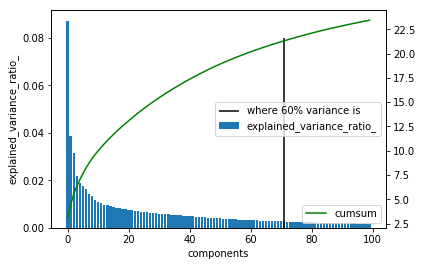

In [67]:
fig, ax1 = plt.subplots()
ax1.bar(range(0,100),pca.explained_variance_ratio_,label = 'explained_variance_ratio_')
ax1.set_xlabel('components')
ax1.set_ylabel('explained_variance_ratio_')

ax2 = ax1.twinx()
ax2.plot(range(0,100),cumsum,label='cumsum',color='g')
position = np.where(np.cumsum(pca.explained_variance_ratio_) >= 0.6)[0][0]
ax1.vlines(position,0,0.08,label='where 60% variance is')
ax1.legend(loc = 'right')
ax2.legend(loc = 'lower right')
plt.show()

In [164]:
ax2 = ax1.twinx()
ax2.plot(range(0,10),cumsum,label='cumsum',color='g')
position = np.where(np.cumsum(pca.explained_variance_ratio_) >= 0.8)[0]
ax1.vlines(position,0,0.08,label='where 80% variance is')
ax1.legend(loc = 'right')
ax2.legend(loc = 'lower right')
plt.show()

In [ ]:
data = digits.data
target = digits.target
data = pd.DataFrame(data)
pca = PCA(n_components=64,svd_solver='full')
trans_data = pca.fit_transform(data)
pca.explained_variance_ratio_
cumsum = np.cumsum(pca.explained_variance_)
fig, ax1 = plt.subplots()
ax1.bar(range(0,64),pca.explained_variance_ratio_,label = 'explained_variance_ratio_')
ax1.set_xlabel('components')
ax1.set_ylabel('explained_variance_ratio_')

ax2 = ax1.twinx()
ax2.plot(range(0,64),cumsum,label='cumsum',color='g')
position = np.where(np.cumsum(pca.explained_variance_ratio_) >= 0.8)[0][0]
ax1.vlines(position,0,0.15,label='where 80% variance is')
ax1.legend(loc = 'right')
ax2.legend(loc = 'lower right')
plt.show()

# 填充之后的数据

In [99]:
data = pd.read_csv('./imputed_data_with_salePrice.csv')

In [186]:
scaler = RobustScaler()

In [187]:
data_X = data.drop('SalePrice',axis = 1)
data_y = data['SalePrice']
log_y = np.log(data_y)

In [188]:
X_scaled = scaler.fit(data_X).transform(data_X)


In [189]:
X_scaled

array([[-0.26765965,  0.        ,  0.        , ...,  0.        ,
        -0.25      ,  1.18608169],
       [ 0.02968157,  0.        ,  0.        , ...,  0.        ,
         0.5       ,  0.        ],
       [ 0.39928773,  0.        ,  0.        , ...,  0.        ,
        -0.1       ,  0.98033283],
       ...,
       [-0.10986491,  0.        ,  0.        , ...,  0.        ,
        -0.2       ,  0.        ],
       [ 0.0579109 ,  0.        ,  0.        , ..., -1.        ,
        -0.1       ,  0.        ],
       [ 0.11008317,  0.        ,  0.        , ...,  0.        ,
         0.25      ,  0.        ]])

In [150]:
# X_scaled = pd.DataFrame(X_scaled)

In [151]:
# X_scaled.to_csv('./X_scaled.csv',index=False)

def transform(X):
    if additional==1:
        X["TotalHouse"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"]   
        X["TotalArea"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"] + X["GarageArea"]

    else:
        X["TotalHouse"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"]   
        X["TotalArea"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"] + X["GarageArea"]

        X["+_TotalHouse_OverallQual"] = X["TotalHouse"] * X["OverallQual"]
        X["+_GrLivArea_OverallQual"] = X["GrLivArea"] * X["OverallQual"]
        X["+_oMSZoning_TotalHouse"] = X["oMSZoning"] * X["TotalHouse"]
        X["+_oMSZoning_OverallQual"] = X["oMSZoning"] + X["OverallQual"]
        X["+_oMSZoning_YearBuilt"] = X["oMSZoning"] + X["YearBuilt"]
        X["+_oNeighborhood_TotalHouse"] = X["oNeighborhood"] * X["TotalHouse"]
        X["+_oNeighborhood_OverallQual"] = X["oNeighborhood"] + X["OverallQual"]
        X["+_oNeighborhood_YearBuilt"] = X["oNeighborhood"] + X["YearBuilt"]
        X["+_BsmtFinSF1_OverallQual"] = X["BsmtFinSF1"] * X["OverallQual"]

        X["-_oFunctional_TotalHouse"] = X["oFunctional"] * X["TotalHouse"]
        X["-_oFunctional_OverallQual"] = X["oFunctional"] + X["OverallQual"]
        X["-_LotArea_OverallQual"] = X["LotArea"] * X["OverallQual"]
        X["-_TotalHouse_LotArea"] = X["TotalHouse"] + X["LotArea"]
        X["-_oCondition1_TotalHouse"] = X["oCondition1"] * X["TotalHouse"]
        X["-_oCondition1_OverallQual"] = X["oCondition1"] + X["OverallQual"]


        X["Bsmt"] = X["BsmtFinSF1"] + X["BsmtFinSF2"] + X["BsmtUnfSF"]
        X["Rooms"] = X["FullBath"]+X["TotRmsAbvGrd"]
        X["PorchArea"] = X["OpenPorchSF"]+X["EnclosedPorch"]+X["3SsnPorch"]+X["ScreenPorch"]
        X["TotalPlace"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"] + X["GarageArea"] + X["OpenPorchSF"]+X["EnclosedPorch"]+X["3SsnPorch"]+X["ScreenPorch"]


        return X

In [190]:
log_y = pd.DataFrame(log_y)

pca = PCA(n_components=50,svd_solver='full')

In [191]:
trans_data = pca.fit_transform(X_scaled)

In [192]:
np.sum(pca.explained_variance_ratio_)

0.9460617547124897

In [193]:
pca.explained_variance_

array([9.08868539, 4.42095343, 3.94857005, 3.03333435, 2.19472612,
       1.84416081, 1.59276769, 1.50869245, 1.28315623, 1.13605338,
       1.10165973, 0.90168077, 0.83577017, 0.68729985, 0.65558985,
       0.6190079 , 0.58736618, 0.54952937, 0.50685228, 0.45381759,
       0.43051693, 0.42499406, 0.39415432, 0.34645139, 0.33348456,
       0.31986782, 0.30500725, 0.2800877 , 0.26915219, 0.25826588,
       0.25516692, 0.23734106, 0.22642059, 0.21000487, 0.20241004,
       0.19785132, 0.18995101, 0.18856745, 0.18140966, 0.17827392,
       0.17427975, 0.15292576, 0.14817617, 0.14032079, 0.13505911,
       0.13351304, 0.12512801, 0.12014042, 0.1112869 , 0.10844563])

In [194]:
cumsum = np.cumsum(pca.explained_variance_)
np.where(np.cumsum(pca.explained_variance_ratio_) >= 0.6)

(array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
        25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41,
        42, 43, 44, 45, 46, 47, 48, 49]),)

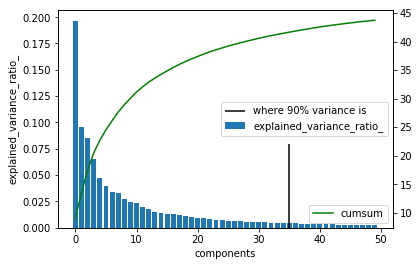

In [202]:
fig, ax1 = plt.subplots()
ax1.bar(range(0,50),pca.explained_variance_ratio_,label = 'explained_variance_ratio_')
ax1.set_xlabel('components')
ax1.set_ylabel('explained_variance_ratio_')

ax2 = ax1.twinx()
ax2.plot(range(0,50),cumsum,label='cumsum',color='g')
position = np.where(np.cumsum(pca.explained_variance_ratio_) >= 0.9)[0][0]
ax1.vlines(position,0,0.08,label='where 90% variance is')
ax1.legend(loc = 'right')
ax2.legend(loc = 'lower right')
plt.show()

In [196]:
lm = LinearRegression()
lm.fit(trans_data,log_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [197]:
pred = lm.predict(trans_data)
from sklearn.metrics import mean_squared_error
mean_squared_error(log_y, pred)
rmse = np.sqrt(mean_squared_error(log_y, pred))
rmse

0.1299470627617122

In [198]:
rf = RandomForestRegressor()
rf.fit(trans_data,log_y)

/Users/hongzhengnan/anaconda3/envs/dme/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/hongzhengnan/anaconda3/envs/dme/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [199]:
pred = rf.predict(trans_data)
from sklearn.metrics import mean_squared_error
mean_squared_error(log_y, pred)
rmse = np.sqrt(mean_squared_error(log_y, pred))
rmse

0.06937549483841898

In [200]:
pred

array([12.24631229, 12.16567838, 12.29482281, ..., 12.49312952,
       11.76895923, 11.95873953])

In [201]:
svr = SVR()
svr.fit(trans_data,log_y)
pred = svr.predict(trans_data)
from sklearn.metrics import mean_squared_error
mean_squared_error(log_y, pred)
rmse = np.sqrt(mean_squared_error(log_y, pred))
rmse

/Users/hongzhengnan/anaconda3/envs/dme/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hongzhengnan/anaconda3/envs/dme/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.08858631052758308